# Competition

##자동차 모델 분류

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers

from keras.models import load_model
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
tf.test.gpu_device_name()

!nvidia-smi

Wed Mar 24 04:44:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |    222MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. DataSet Load

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


> ## 1) 'DataSet.pkl'

* 압축형식 : 'Gzip'

In [ ]:
url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression = 'gzip')

DF.shape

(24916, 2701)

> ## 2) DataFrame Information

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [ ]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


> ## 3) 'X', 'y' 분리

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

> ## 4) Visualization

* '0'번 인덱스 label 및 이미지

G80스포츠


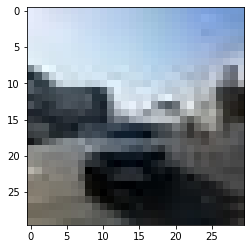

In [ ]:
print(y.iloc[0])

plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3))
plt.show()

* '200'번 인덱스 label 및 이미지

G80스포츠


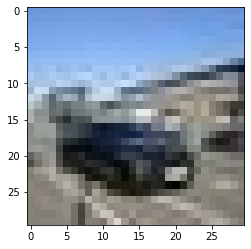

In [ ]:
print(y.iloc[200])

plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))
plt.show()

* '400'번 인덱스 label 및 이미지

G80스포츠


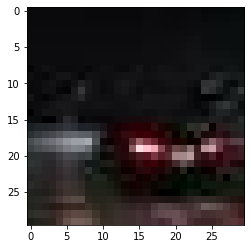

In [ ]:
print(y.iloc[400])

plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))
plt.show()

# II. Data Preprocessing

### 1) X reshape

In [ ]:
X.shape

(24916, 2700)

In [ ]:
X_reshape = []

for i in range(X.shape[0]) :
  a = X.iloc[i].values.astype(np.int).reshape(30,30,3)
  X_reshape.append(a)

In [ ]:
X_reshape = np.array(X_reshape)

X_reshape.shape

(24916, 30, 30, 3)

### 2) y One Hot Encoding

In [ ]:
y = DF.iloc[:,-1]

y

0        G80스포츠
1        G80스포츠
2        G80스포츠
3        G80스포츠
4        G80스포츠
          ...  
24911     팰리세이드
24912     팰리세이드
24913     팰리세이드
24914     팰리세이드
24915     팰리세이드
Name: 2700, Length: 24916, dtype: object

In [ ]:
y.nunique()

34

In [ ]:
y = np.array(y)

y

array(['G80스포츠', 'G80스포츠', 'G80스포츠', ..., '팰리세이드', '팰리세이드', '팰리세이드'],
      dtype=object)

In [ ]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([ 0,  0,  0, ..., 33, 33, 33])

In [ ]:
y = to_categorical(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape

(24916, 34)

### 3) Train, Valid, Test Split

In [ ]:
train_data, X_test, train_targets, y_test = train_test_split(X_reshape, y,
                                                              test_size = 0.2,
                                                              random_state = 2046)

train_data.shape, X_test.shape, train_targets.shape, y_test.shape

((19932, 30, 30, 3), (4984, 30, 30, 3), (19932, 34), (4984, 34))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2046)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15945, 30, 30, 3), (3987, 30, 30, 3), (15945, 34), (3987, 34))

### 4) Image Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = 'nearest')

train_set = train_generator.flow(X_train, y_train, batch_size = 256)

In [ ]:
valid_generator = ImageDataGenerator(rescale = 1. / 255)
valid_set = valid_generator.flow(X_valid, y_valid, batch_size = 256)

In [ ]:
test_generator = ImageDataGenerator(rescale = 1. / 255)
test_set = test_generator.flow(X_test, y_test, batch_size = 256)

# III. Modeling

### 1) Case별 define & compile

In [ ]:
model_1 = models.Sequential()

model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                        input_shape=(30, 30, 3)))
model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_1.add(layers.MaxPool2D(pool_size=(2,2)))
model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_1.add(layers.MaxPool2D(pool_size=(2,2)))
model_1.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=256, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [ ]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                          padding = 'same' , input_shape=(30, 30, 3)))
model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))
model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))
model_2.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(units=512, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# batch size 256
model_3 = models.Sequential()

model_3.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same' , input_shape=(30, 30, 3)))
model_3.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_3.add(layers.MaxPool2D(pool_size=(2,2)))
model_3.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_3.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_3.add(layers.MaxPool2D(pool_size=(2,2)))
model_3.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(units=1024, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
model_3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# batch size 256
model_4 = models.Sequential()

model_4.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same' , input_shape=(30, 30, 3)))
model_4.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_4.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_4.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',
                          padding = 'same'))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(units=1024, activation='relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 128)       

In [ ]:
model_4.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# batch size 256
model_5 = models.Sequential()

model_5.add(layers.Conv2D(filters=128, kernel_size=(3,3),
                          padding = 'same', input_shape=(30, 30, 3)))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.MaxPool2D(pool_size=(2,2)))

model_5.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.MaxPool2D(pool_size=(2,2)))

model_5.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(units=1024, activation='relu'))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 128)     

In [ ]:
model_5.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model_6 = models.Sequential()

model_6.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                          padding = 'same' , input_shape=(30, 30, 3)))
model_6.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_6.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))
model_6.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_6.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_6.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))
model_6.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(units=1024, activation='relu'))
model_6.add(layers.Dropout(0.5))
model_6.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 15, 15, 128)     

In [ ]:
model_6.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model_7 = models.Sequential()

model_7.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                          padding = 'same' , input_shape=(30, 30, 3)))
model_7.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_7.add(layers.MaxPool2D(pool_size=(2,2)))

model_7.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                           padding = 'same'))
model_7.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_7.add(layers.MaxPool2D(pool_size=(2,2)))

model_7.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_7.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_7.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu',
                          padding = 'same'))
model_7.add(layers.MaxPool2D(pool_size=(2,2)))



model_7.add(layers.Flatten())
model_7.add(layers.Dense(units=1024, activation='relu'))
model_7.add(layers.Dense(units=512, activation='relu'))
model_7.add(layers.Dense(units=34, activation='softmax'))

In [ ]:
model_7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
15945 / 256

62.28515625

In [ ]:
3987 / 256

15.57421875

### 2) Model Fit

In [ ]:
%%time

Hist_1 = model_1.fit(train_set,
                       steps_per_epoch = 31,
                       epochs = 50,
                       validation_data = valid_set,
                       validation_steps = 7)

Epoch 1/50
31/31 [==============================] - 42s 246ms/step - loss: 3.4985 - accuracy: 0.0692 - val_loss: 3.4516 - val_accuracy: 0.0795
Epoch 2/50
31/31 [==============================] - 8s 255ms/step - loss: 3.4507 - accuracy: 0.0756 - val_loss: 3.3329 - val_accuracy: 0.0918
Epoch 3/50
31/31 [==============================] - 8s 250ms/step - loss: 3.2869 - accuracy: 0.0856 - val_loss: 3.0815 - val_accuracy: 0.1127
Epoch 4/50
31/31 [==============================] - 8s 250ms/step - loss: 3.1706 - accuracy: 0.0926 - val_loss: 2.9980 - val_accuracy: 0.1119
Epoch 5/50
31/31 [==============================] - 8s 247ms/step - loss: 3.0848 - accuracy: 0.1051 - val_loss: 3.1037 - val_accuracy: 0.1186
Epoch 6/50
31/31 [==============================] - 8s 246ms/step - loss: 3.0525 - accuracy: 0.1055 - val_loss: 2.9255 - val_accuracy: 0.1219
Epoch 7/50
31/31 [==============================] - 8s 245ms/step - loss: 2.9783 - accuracy: 0.1109 - val_loss: 2.9910 - val_accuracy: 0.1183
Epoch

In [ ]:
Hist_2 = model_2.fit(train_set,
                       steps_per_epoch = 31,
                       epochs = 50,
                       validation_data = valid_set,
                       validation_steps = 7)

Epoch 1/50
31/31 [==============================] - 10s 254ms/step - loss: 3.5005 - accuracy: 0.0661 - val_loss: 3.3925 - val_accuracy: 0.0940
Epoch 2/50
31/31 [==============================] - 8s 245ms/step - loss: 3.3727 - accuracy: 0.0809 - val_loss: 3.1414 - val_accuracy: 0.0837
Epoch 3/50
31/31 [==============================] - 8s 246ms/step - loss: 3.2065 - accuracy: 0.0849 - val_loss: 3.0979 - val_accuracy: 0.1155
Epoch 4/50
31/31 [==============================] - 8s 246ms/step - loss: 3.0908 - accuracy: 0.0996 - val_loss: 2.9377 - val_accuracy: 0.1295
Epoch 5/50
31/31 [==============================] - 8s 245ms/step - loss: 3.0073 - accuracy: 0.1045 - val_loss: 2.9804 - val_accuracy: 0.1283
Epoch 6/50
31/31 [==============================] - 8s 247ms/step - loss: 2.9274 - accuracy: 0.1174 - val_loss: 2.8744 - val_accuracy: 0.1387
Epoch 7/50
31/31 [==============================] - 8s 246ms/step - loss: 2.8716 - accuracy: 0.1266 - val_loss: 2.6869 - val_accuracy: 0.1671
Epoch

In [ ]:
Hist_3 = model_3.fit(train_set,
                       steps_per_epoch = 62,
                       epochs = 50,
                       validation_data = valid_set,
                       validation_steps = 15)

Epoch 1/50
62/62 [==============================] - 10s 135ms/step - loss: 3.5114 - accuracy: 0.0627 - val_loss: 3.4600 - val_accuracy: 0.0904
Epoch 2/50
62/62 [==============================] - 8s 129ms/step - loss: 3.4616 - accuracy: 0.0780 - val_loss: 3.1898 - val_accuracy: 0.1105
Epoch 3/50
62/62 [==============================] - 8s 129ms/step - loss: 3.1898 - accuracy: 0.0930 - val_loss: 2.9847 - val_accuracy: 0.1295
Epoch 4/50
62/62 [==============================] - 8s 129ms/step - loss: 3.0321 - accuracy: 0.1075 - val_loss: 2.9357 - val_accuracy: 0.1323
Epoch 5/50
62/62 [==============================] - 8s 129ms/step - loss: 2.9193 - accuracy: 0.1221 - val_loss: 2.8983 - val_accuracy: 0.1217
Epoch 6/50
62/62 [==============================] - 8s 129ms/step - loss: 2.8031 - accuracy: 0.1375 - val_loss: 2.8839 - val_accuracy: 0.1462
Epoch 7/50
62/62 [==============================] - 8s 130ms/step - loss: 2.7205 - accuracy: 0.1595 - val_loss: 2.7108 - val_accuracy: 0.1780
Epoch

In [ ]:
Hist_4 = model_4.fit(train_set,
                       steps_per_epoch = 62,
                       epochs = 50,
                       validation_data = valid_set,
                       validation_steps = 15)

Epoch 1/50
62/62 [==============================] - 9s 140ms/step - loss: 3.4975 - accuracy: 0.0719 - val_loss: 3.4720 - val_accuracy: 0.0802
Epoch 2/50
62/62 [==============================] - 9s 138ms/step - loss: 3.4242 - accuracy: 0.0812 - val_loss: 3.1213 - val_accuracy: 0.1008
Epoch 3/50
62/62 [==============================] - 9s 140ms/step - loss: 3.1704 - accuracy: 0.0906 - val_loss: 3.0118 - val_accuracy: 0.1221
Epoch 4/50
62/62 [==============================] - 9s 138ms/step - loss: 2.9878 - accuracy: 0.1107 - val_loss: 2.8955 - val_accuracy: 0.1310
Epoch 5/50
62/62 [==============================] - 9s 138ms/step - loss: 2.8378 - accuracy: 0.1322 - val_loss: 2.9898 - val_accuracy: 0.1234
Epoch 6/50
62/62 [==============================] - 9s 138ms/step - loss: 2.7744 - accuracy: 0.1445 - val_loss: 2.8050 - val_accuracy: 0.1589
Epoch 7/50
62/62 [==============================] - 9s 138ms/step - loss: 2.6996 - accuracy: 0.1581 - val_loss: 2.6825 - val_accuracy: 0.1531
Epoch 

In [ ]:
# model_3 이 최적. 좀 더 학습시킬 필요 있어보임.

### 3) Model 3 Fitting with Early Stopping

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max' ,
                   patience = 150,
                   verbose = 1)

In [ ]:
mc = ModelCheckpoint('best_car_classification.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

In [ ]:
Hist_3 = model_3.fit(train_set,
                     steps_per_epoch = 62,
                     epochs = 500,
                     validation_data = valid_set,
                     validation_steps = 15,
                     callbacks = [es, mc],
                     verbose = 1)

Epoch 1/500
62/62 [==============================] - 8s 136ms/step - loss: 1.3030 - accuracy: 0.5496 - val_loss: 1.9768 - val_accuracy: 0.4594

Epoch 00001: val_accuracy improved from -inf to 0.45937, saving model to best_car_classification.h5
Epoch 2/500
62/62 [==============================] - 8s 134ms/step - loss: 1.3161 - accuracy: 0.5444 - val_loss: 1.6642 - val_accuracy: 0.4958

Epoch 00002: val_accuracy improved from 0.45937 to 0.49583, saving model to best_car_classification.h5
Epoch 3/500
62/62 [==============================] - 8s 135ms/step - loss: 1.2846 - accuracy: 0.5521 - val_loss: 1.7864 - val_accuracy: 0.4883

Epoch 00003: val_accuracy did not improve from 0.49583
Epoch 4/500
62/62 [==============================] - 8s 134ms/step - loss: 1.2706 - accuracy: 0.5637 - val_loss: 2.3316 - val_accuracy: 0.4273

Epoch 00004: val_accuracy did not improve from 0.49583
Epoch 5/500
62/62 [==============================] - 8s 135ms/step - loss: 1.2640 - accuracy: 0.5639 - val_loss

In [ ]:
Hist_4 = model_4.fit(train_set,
                     steps_per_epoch = 62,
                     epochs = 500,
                     validation_data = valid_set,
                     validation_steps = 15,
                     callbacks = [es, mc],
                     verbose = 1)

Epoch 1/500
62/62 [==============================] - 9s 142ms/step - loss: 3.4966 - accuracy: 0.0679 - val_loss: 3.4663 - val_accuracy: 0.0802

Epoch 00001: val_accuracy did not improve from 0.78333
Epoch 2/500
62/62 [==============================] - 9s 138ms/step - loss: 3.3989 - accuracy: 0.0835 - val_loss: 3.0775 - val_accuracy: 0.1078

Epoch 00002: val_accuracy did not improve from 0.78333
Epoch 3/500
62/62 [==============================] - 9s 139ms/step - loss: 3.1327 - accuracy: 0.0921 - val_loss: 2.9045 - val_accuracy: 0.1253

Epoch 00003: val_accuracy did not improve from 0.78333
Epoch 4/500
62/62 [==============================] - 9s 138ms/step - loss: 2.9749 - accuracy: 0.1115 - val_loss: 2.8616 - val_accuracy: 0.1297

Epoch 00004: val_accuracy did not improve from 0.78333
Epoch 5/500
62/62 [==============================] - 9s 138ms/step - loss: 2.8494 - accuracy: 0.1275 - val_loss: 2.7775 - val_accuracy: 0.1367

Epoch 00005: val_accuracy did not improve from 0.78333
Epoch

In [ ]:
Hist_6 = model_6.fit(train_set,
                     steps_per_epoch = 62,
                     epochs = 500,
                     validation_data = valid_set,
                     validation_steps = 15,
                     callbacks = [es, mc],
                     verbose = 1)

Epoch 1/500
62/62 [==============================] - 10s 135ms/step - loss: 3.4919 - accuracy: 0.0738 - val_loss: 3.4037 - val_accuracy: 0.0802

Epoch 00001: val_accuracy did not improve from 0.70599
Epoch 2/500
62/62 [==============================] - 8s 133ms/step - loss: 3.3377 - accuracy: 0.0866 - val_loss: 3.1176 - val_accuracy: 0.1060

Epoch 00002: val_accuracy did not improve from 0.70599
Epoch 3/500
62/62 [==============================] - 8s 132ms/step - loss: 3.1145 - accuracy: 0.0945 - val_loss: 2.8928 - val_accuracy: 0.1326

Epoch 00003: val_accuracy did not improve from 0.70599
Epoch 4/500
62/62 [==============================] - 8s 132ms/step - loss: 2.9384 - accuracy: 0.1140 - val_loss: 2.9624 - val_accuracy: 0.1240

Epoch 00004: val_accuracy did not improve from 0.70599
Epoch 5/500
62/62 [==============================] - 8s 133ms/step - loss: 2.8802 - accuracy: 0.1291 - val_loss: 2.7695 - val_accuracy: 0.1573

Epoch 00005: val_accuracy did not improve from 0.70599
Epoc

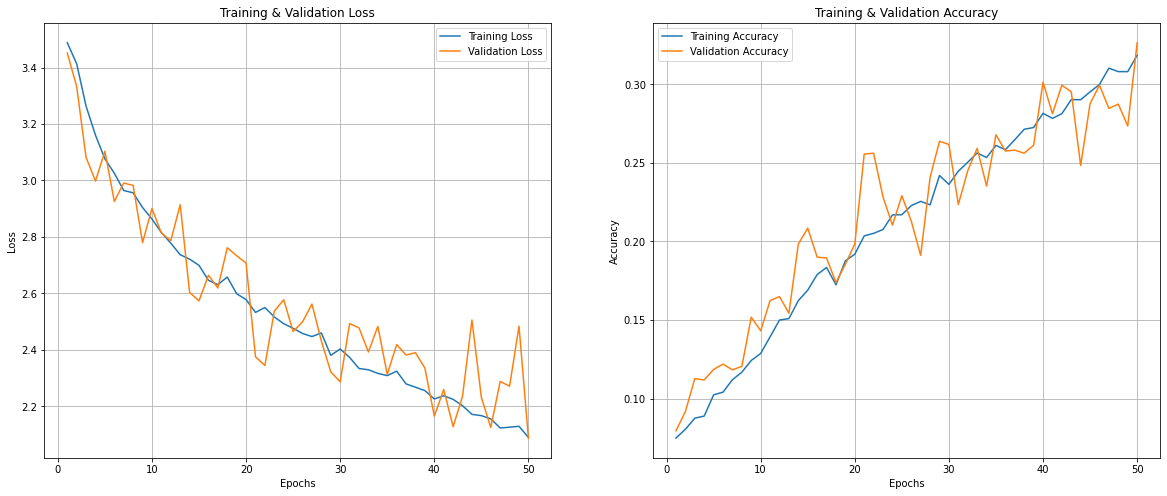

In [ ]:
epochs = range(1, len(Hist_1.history['loss']) + 1)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_1.history['loss'])
plt.plot(epochs, Hist_1.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_1.history['accuracy'])
plt.plot(epochs, Hist_1.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

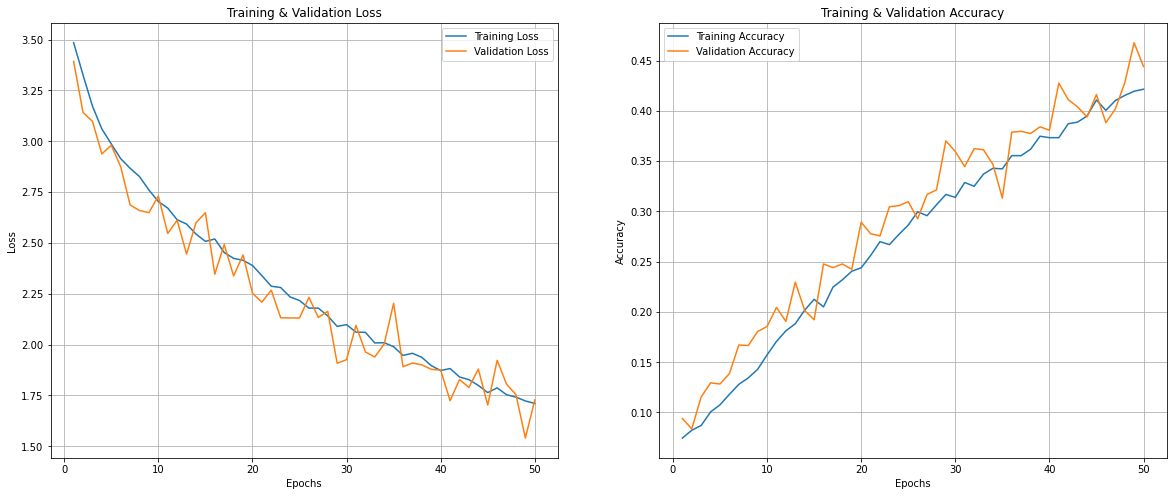

In [ ]:
epochs = range(1, len(Hist_2.history['loss']) + 1)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_2.history['loss'])
plt.plot(epochs, Hist_2.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_2.history['accuracy'])
plt.plot(epochs, Hist_2.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

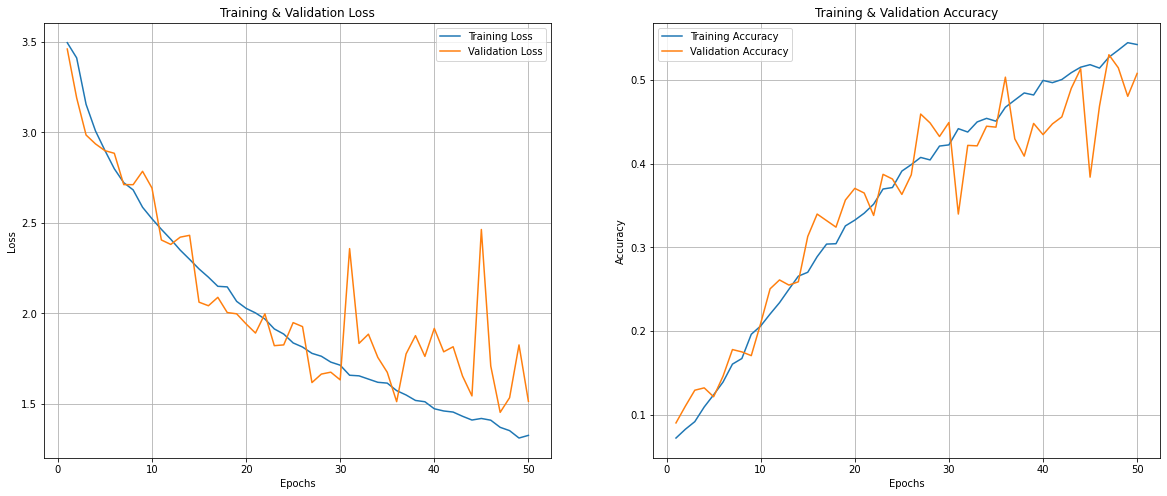

In [ ]:
epochs = range(1, len(Hist_3.history['loss']) + 1)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_3.history['loss'])
plt.plot(epochs, Hist_3.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_3.history['accuracy'])
plt.plot(epochs, Hist_3.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

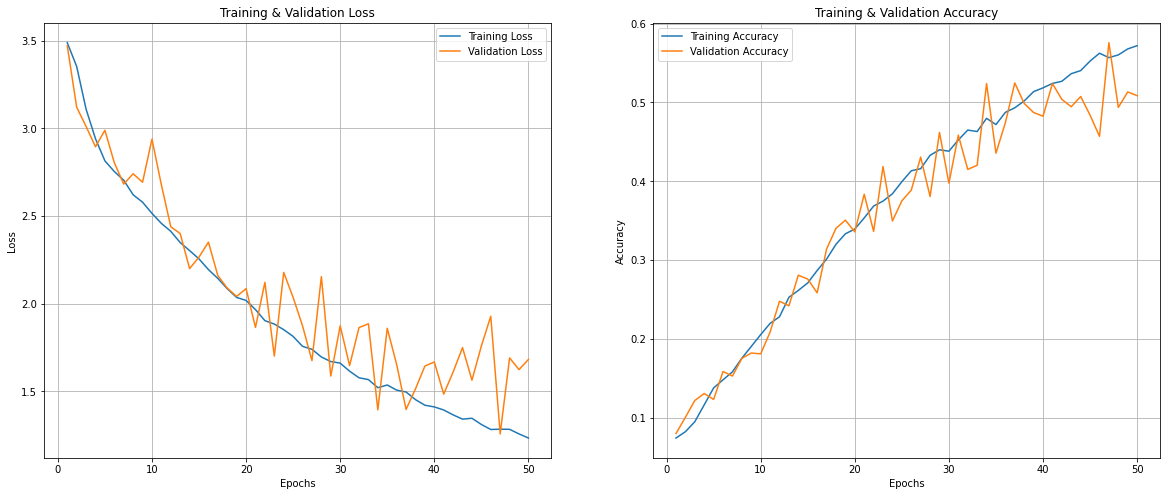

In [ ]:
epochs = range(1, len(Hist_4.history['loss']) + 1)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_4.history['loss'])
plt.plot(epochs, Hist_4.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_4.history['accuracy'])
plt.plot(epochs, Hist_4.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

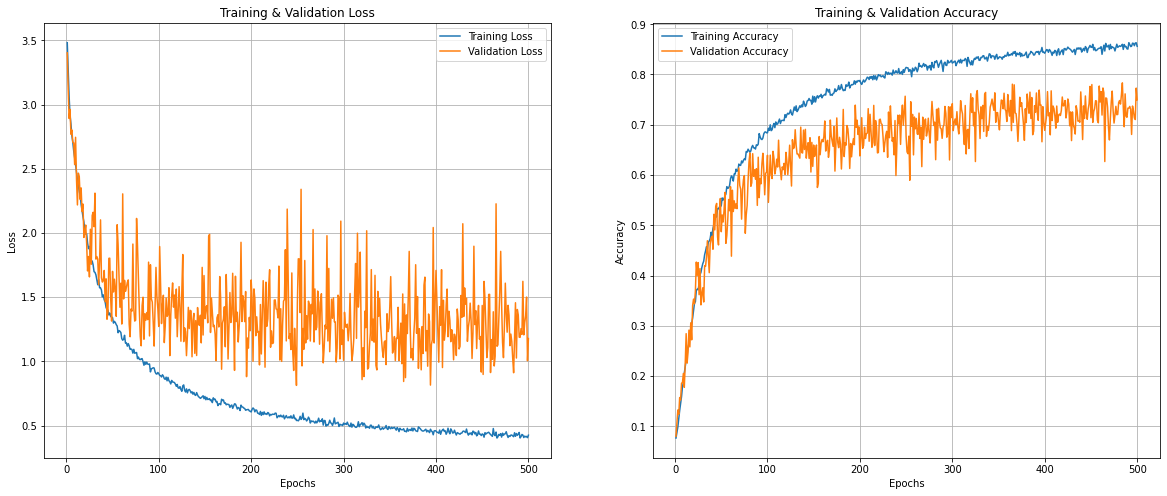

In [ ]:
epochs = range(1, len(Hist_6.history['loss']) + 1)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_6.history['loss'])
plt.plot(epochs, Hist_6.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_6.history['accuracy'])
plt.plot(epochs, Hist_6.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

### 4) Model Evaluate

- best model: Model 6 --- 0.74498
- 시간을 가지고 더 튜닝해보고 싶은 욕심이 든다

In [ ]:
loss, accuracy = model_1.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

10/10 [==============================] - 1s 125ms/step - loss: 2.1023 - accuracy: 0.3180
Loss = 2.10232
Accuracy = 0.31802


In [ ]:
loss, accuracy = model_2.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

10/10 [==============================] - 1s 117ms/step - loss: 1.7749 - accuracy: 0.4197
Loss = 1.77492
Accuracy = 0.41974


In [ ]:
loss, accuracy = model_3.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

32/32 [==============================] - 2s 28ms/step - loss: 1.4876 - accuracy: 0.5138
Loss = 1.48760
Accuracy = 0.51384


In [ ]:
loss, accuracy = model_4.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

32/32 [==============================] - 1s 18ms/step - loss: 1.7036 - accuracy: 0.4992
Loss = 1.70358
Accuracy = 0.49920


In [ ]:
loss, accuracy = model_3.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

20/20 [==============================] - 1s 43ms/step - loss: 1.7042 - accuracy: 0.6041
Loss = 1.70418
Accuracy = 0.60413


In [ ]:
loss, accuracy = model_6.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

20/20 [==============================] - 1s 29ms/step - loss: 1.1841 - accuracy: 0.7450
Loss = 1.18413
Accuracy = 0.74498


### 5) Model Save

In [ ]:
model_6.save('/content/drive/My Drive/Colab Notebooks/models/car_classification.h5')

In [ ]:
model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/car_classification.h5')

In [ ]:
loss, accuracy = model_google.evaluate(test_set)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

20/20 [==============================] - 1s 20ms/step - loss: 1.1841 - accuracy: 0.7450
Loss = 1.18413
Accuracy = 0.74498
